# Libraries


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np


In [ ]:
#Loading the dataset
data = yf.download("AAPL", start="2018-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Data Cleaning
data = data[['Close']].dropna()

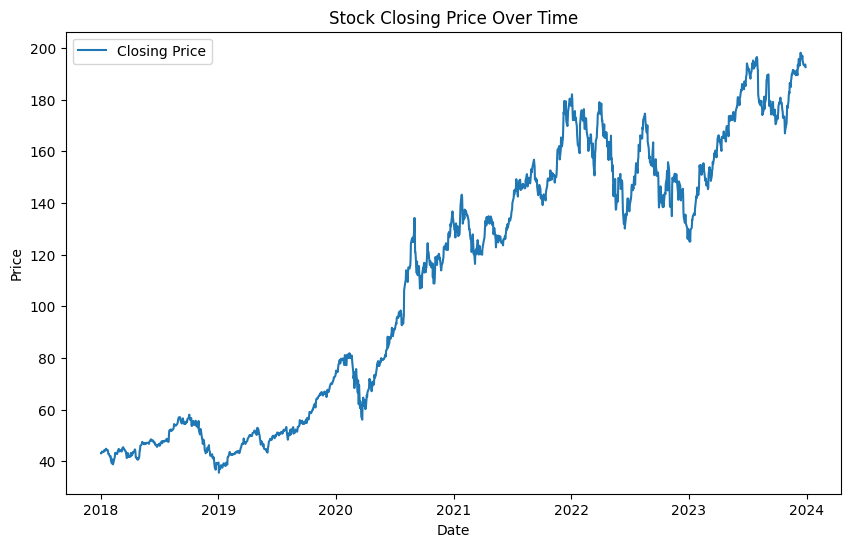

In [ ]:
#EDA
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

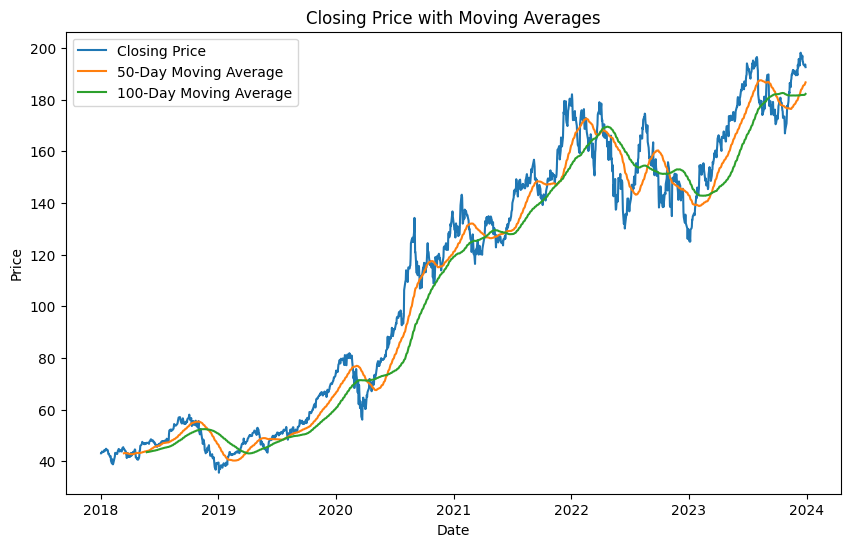

In [ ]:
# Calculate and plot moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA100'] = data['Close'].rolling(window=100).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['MA50'], label='50-Day Moving Average')
plt.plot(data['MA100'], label='100-Day Moving Average')
plt.title('Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

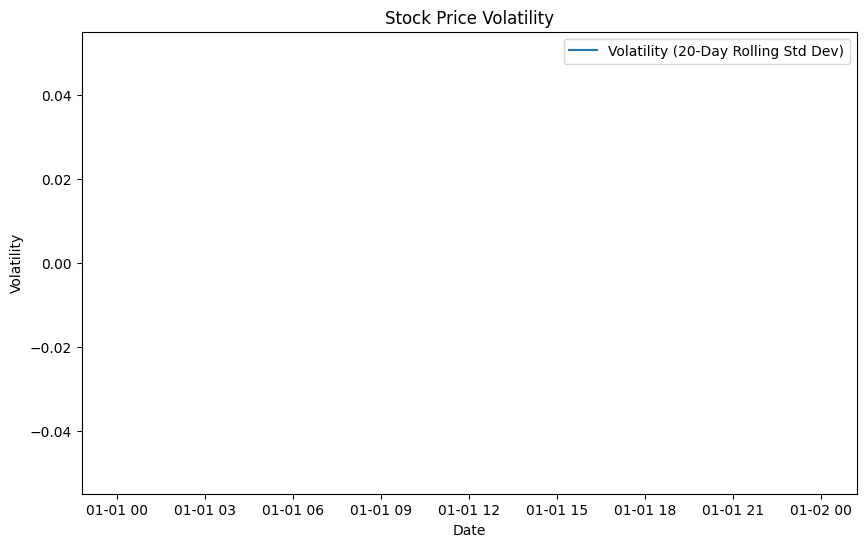

In [ ]:
# 4. Volatility Analysis
data['Volatility'] = data['Close'].rolling(window=20).std()

plt.figure(figsize=(10, 6))
plt.plot(data['Volatility'], label='Volatility (20-Day Rolling Std Dev)')
plt.title('Stock Price Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [ ]:
# MODEL

#Splitting the dataset
train = data['Close'][:int(0.8 * len(data))]
test = data['Close'][int(0.8 * len(data)):]

model = ARIMA(train, order=(5, 1, 0))  # ARIMA(p,d,q) where p=5, d=1, q=0
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

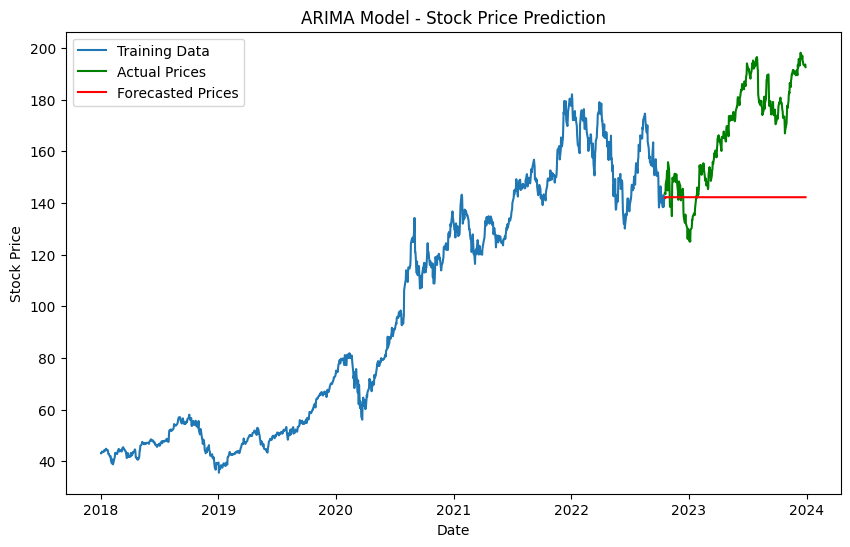

In [ ]:
# 7. Visualization of Forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Prices', color='green')
plt.plot(test.index, forecast, label='Forecasted Prices', color='red')
plt.title('ARIMA Model - Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

